In [2]:
import pandas as pd
import numpy as np

In [3]:
# df = pd.read_csv("/content/final.csv")

In [4]:
train_df = pd.read_csv('train.csv')
train_df = train_df.drop(['Unnamed: 0'], axis=1)
test_df = pd.read_csv('test.csv')
test_df = test_df.drop(['Unnamed: 0'], axis=1)

In [5]:
# df.columns

In [ ]:
# df = df.drop(['Unnamed: 0', 'Year', 'DepartureDelayGroups', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'DivAirportLandings', 'wpgt', 'tsun'], axis = 1)

In [ ]:
# df = df.drop(['Tail_Number'], axis = 1)

In [ ]:
# df

,FlightDate,DOT_ID_Reporting_Airline,Flight_Number_Reporting_Airline,OriginAirportID,OriginCityName,OriginWac,DestAirportID,DestCityName,DestWac,CRSDepTime,...,CancellationCode_encoded,index,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres
0,2024-01-15,20409,616,14771,"San Francisco, CA",91,12478,"New York, NY",22,1556,...,0.0,2024-01-15,10.6,7.2,15.0,0.0,NaN,54.0,9.0,1020.4
1,2024-01-28,19805,341,11298,"Dallas/Fort Worth, TX",74,14492,"Raleigh/Durham, NC",36,2059,...,0.0,2024-01-28,7.8,1.1,16.7,0.0,0.0,282.0,10.1,1028.9
2,2024-01-02,19393,3257,10821,"Baltimore, MD",35,14107,"Phoenix, AZ",81,605,...,0.0,2024-01-02,5.5,2.8,7.8,0.0,0.0,310.0,15.4,1019.9
3,2024-01-07,20304,3848,13487,"Minneapolis, MN",63,13232,"Chicago, IL",41,910,...,0.0,2024-01-07,-4.3,-5.0,-1.7,0.0,0.0,317.0,10.2,1015.0
4,2024-01-31,20452,3493,12264,"Washington, DC",38,10785,"Burlington, VT",16,1235,...,0.0,2024-01-31,4.9,2.8,6.7,0.0,0.0,33.0,6.8,1019.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266509,2024-06-17,19393,3995,11292,"Denver, CO",82,10713,"Boise, ID",83,2245,...,0.0,2024-06-09,15.6,12.2,21.1,22.4,0.0,275.0,15.8,1004.6
266510,2024-06-05,20436,3333,14100,"Philadelphia, PA",23,11292,"Denver, CO",82,2027,...,0.0,2024-06-13,27.2,22.2,33.3,0.0,0.0,152.0,9.3,1013.2
266511,2024-06-05,19790,2496,10397,"Atlanta, GA",34,13577,"Myrtle Beach, SC",37,1226,...,0.0,2024-06-04,33.0,28.0,40.7,7.0,0.0,142.0,21.9,1002.6
266512,2024-06-25,20363,5068,11057,"Charlotte, NC",36,12953,"New York, NY",22,900,...,0.0,2024-06-13,23.1,17.8,28.3,0.0,0.0,219.0,10.9,1015.9


In [6]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

# Combine both columns to ensure consistent encoding
combined_data = pd.concat([df['OriginCityName'], df['DestCityName']], axis=0)

# Fit the encoder on the combined data
le.fit(combined_data)

# Transform both columns with the same encoder
df['OriginCityEncoded'] = le.transform(df['OriginCityName'])
df['DestCityEncoded'] = le.transform(df['DestCityName'])

print(df)

        FlightDate  DOT_ID_Reporting_Airline  Flight_Number_Reporting_Airline  \
0       2024-01-15                     20409                              616   
1       2024-01-28                     19805                              341   
2       2024-01-02                     19393                             3257   
3       2024-01-07                     20304                             3848   
4       2024-01-31                     20452                             3493   
...            ...                       ...                              ...   
266509  2024-06-17                     19393                             3995   
266510  2024-06-05                     20436                             3333   
266511  2024-06-05                     19790                             2496   
266512  2024-06-25                     20363                             5068   
266513  2024-06-19                     19790                             1930   

        OriginAirportID    

In [ ]:
df = df.drop(['OriginCityName', 'DestCityName'], axis = 1)

In [ ]:
df = df.drop(['index'], axis = 1)
df.columns

Index(['FlightDate', 'DOT_ID_Reporting_Airline',
       'Flight_Number_Reporting_Airline', 'OriginAirportID', 'OriginWac',
       'DestAirportID', 'DestWac', 'CRSDepTime', 'DepTime', 'DepDelayMinutes',
       'CRSArrTime', 'ArrTime', 'ArrDelayMinutes', 'Diverted',
       'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'Flights', 'Distance',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax',
       'prcp', 'snow', 'wdir', 'wspd', 'pres', 'OriginCityEncoded',
       'DestCityEncoded'],
      dtype='object')

In [ ]:
df['CancellationCode_encoded'].value_counts()

,count
CancellationCode_encoded,
0.0,261276
2.0,3021
1.0,1719
3.0,462
4.0,35


In [ ]:
grouped = df.groupby(['FlightDate', 'OriginCityEncoded'])

# Fill NaN in Col1 with the mean of matching groups
for col in ['tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'pres']:
    df[col] = grouped[col].transform(lambda x: x.fillna(x.mean()))

In [ ]:
df

,FlightDate,DOT_ID_Reporting_Airline,Flight_Number_Reporting_Airline,OriginAirportID,OriginWac,DestAirportID,DestWac,CRSDepTime,DepTime,DepDelayMinutes,...,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres,OriginCityEncoded,DestCityEncoded
0,2024-01-15,20409,616,14771,91,12478,22,1556,1610.0,14.0,...,10.6,7.2,15.0,0.0,4.285714,54.0,9.0,1020.4,297,235
1,2024-01-28,19805,341,11298,74,14492,36,2059,2106.0,7.0,...,7.8,1.1,16.7,0.0,0.000000,282.0,10.1,1028.9,81,276
2,2024-01-02,19393,3257,10821,35,14107,81,605,604.0,0.0,...,5.5,2.8,7.8,0.0,0.000000,310.0,15.4,1019.9,24,262
3,2024-01-07,20304,3848,13487,63,13232,41,910,904.0,0.0,...,-4.3,-5.0,-1.7,0.0,0.000000,317.0,10.2,1015.0,217,64
4,2024-01-31,20452,3493,12264,38,10785,16,1235,1422.0,107.0,...,4.9,2.8,6.7,0.0,0.000000,33.0,6.8,1019.2,348,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546943,2022-12-20,20363,5136,10397,34,14814,72,2159,2156.0,0.0,...,0.9,-7.2,12.8,0.3,0.000000,26.0,7.3,1020.1,19,314
546944,2022-12-07,20416,144,13796,91,12889,85,545,539.0,0.0,...,12.1,10.6,13.9,0.3,0.000000,223.0,8.7,1021.9,244,188
546945,2022-12-10,19393,3183,10693,54,11259,74,1325,1329.0,4.0,...,5.7,4.4,7.2,5.8,0.000000,1.0,2.2,1018.4,232,80
546946,2022-12-21,19393,1364,12402,2,12173,2,620,616.0,0.0,...,-16.4,-25.6,10.6,6.4,127.000000,35.0,20.2,1029.2,148,151


In [ ]:
df.isna().sum()

,0
FlightDate,0
DOT_ID_Reporting_Airline,0
Flight_Number_Reporting_Airline,0
OriginAirportID,0
OriginWac,0
DestAirportID,0
DestWac,0
CRSDepTime,0
DepTime,5074
DepDelayMinutes,5079


In [ ]:
df = df.drop(['snow'], axis=1)
df = df.dropna()
df

,FlightDate,DOT_ID_Reporting_Airline,Flight_Number_Reporting_Airline,OriginAirportID,OriginWac,DestAirportID,DestWac,CRSDepTime,DepTime,DepDelayMinutes,...,CancellationCode_encoded,tavg,tmin,tmax,prcp,wdir,wspd,pres,OriginCityEncoded,DestCityEncoded
4,2024-01-31,20452,3493,12264,38,10785,16,1235,1422.0,107.0,...,0.0,4.9,2.8,6.7,0.0,33.0,6.8,1019.2,347,50
5,2024-01-15,19790,1204,11433,43,14635,33,1250,1355.0,65.0,...,0.0,-15.3,-18.5,-11.9,0.0,234.0,21.8,1023.6,89,117
7,2024-01-05,20368,292,14262,91,10666,93,1825,1831.0,6.0,...,0.0,13.8,5.6,21.7,0.0,326.0,8.5,1020.4,253,30
10,2024-01-13,19790,2459,12197,22,14027,33,1505,1712.0,127.0,...,0.0,7.9,0.6,13.9,35.3,226.0,21.8,995.3,352,350
17,2024-01-09,19393,1670,14986,33,11259,74,1255,1901.0,366.0,...,0.0,21.2,17.2,25.0,7.2,178.0,30.8,1010.2,306,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266504,2024-06-23,19805,2937,11057,36,15016,64,1832,2103.0,151.0,...,0.0,20.9,17.8,27.2,0.0,310.0,9.4,1009.1,60,323
266507,2024-06-14,20368,414,14112,33,15412,54,1055,1138.0,43.0,...,0.0,18.3,17.2,21.7,0.0,231.0,7.9,1011.8,324,177
266508,2024-06-09,19393,1549,11292,82,15376,81,1320,1508.0,108.0,...,0.0,25.3,20.6,30.0,0.0,325.0,8.7,1010.5,87,337
266510,2024-06-05,20436,3333,14100,23,11292,82,2027,2022.0,0.0,...,0.0,27.2,22.2,33.3,0.0,152.0,9.3,1013.2,260,87


In [ ]:
df.isna().sum()

,0
FlightDate,0
DOT_ID_Reporting_Airline,0
Flight_Number_Reporting_Airline,0
OriginAirportID,0
OriginWac,0
DestAirportID,0
DestWac,0
CRSDepTime,0
DepTime,0
DepDelayMinutes,0


In [ ]:
df[['ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']] = df[['ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']].fillna(0)

In [ ]:
y = df[['DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]

In [ ]:
x = df.drop(['DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)

In [ ]:
x

,FlightDate,DOT_ID_Reporting_Airline,Flight_Number_Reporting_Airline,OriginAirportID,OriginWac,DestAirportID,DestWac,CRSDepTime,CRSArrTime,CRSElapsedTime,Flights,Distance,OriginCityEncoded,DestCityEncoded
4,2024-01-31,20452,3493,12264,38,10785,16,1235,1413.0,98.0,1.0,441.0,347,50
5,2024-01-15,19790,1204,11433,43,14635,33,1250,1540.0,170.0,1.0,1084.0,89,117
7,2024-01-05,20368,292,14262,91,10666,93,1825,2123.0,178.0,1.0,1078.0,253,30
10,2024-01-13,19790,2459,12197,22,14027,33,1505,1808.0,183.0,1.0,1056.0,352,350
17,2024-01-09,19393,1670,14986,33,11259,74,1255,1440.0,165.0,1.0,934.0,306,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266504,2024-06-23,19805,2937,11057,36,15016,64,1832,1929.0,117.0,1.0,575.0,60,323
266507,2024-06-14,20368,414,14112,33,15412,54,1055,1236.0,101.0,1.0,550.0,324,177
266508,2024-06-09,19393,1549,11292,82,15376,81,1320,1415.0,115.0,1.0,639.0,87,337
266510,2024-06-05,20436,3333,14100,23,11292,82,2027,2248.0,261.0,1.0,1558.0,260,87


In [ ]:
y

,DepTime,DepDelayMinutes,ArrTime,ArrDelayMinutes,Diverted,ActualElapsedTime,AirTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,CancellationCode_encoded,tavg,tmin,tmax,prcp,wdir,wspd,pres
4,1422.0,107.0,1550.0,97.0,0.0,88.0,69.0,97.0,0.0,0.0,0.0,0.0,0.0,4.9,2.8,6.7,0.0,33.0,6.8,1019.2
5,1355.0,65.0,1654.0,74.0,0.0,179.0,158.0,0.0,7.0,9.0,0.0,58.0,0.0,-15.3,-18.5,-11.9,0.0,234.0,21.8,1023.6
7,1831.0,6.0,2142.0,19.0,0.0,191.0,163.0,0.0,0.0,18.0,0.0,1.0,0.0,13.8,5.6,21.7,0.0,326.0,8.5,1020.4
10,1712.0,127.0,2018.0,130.0,0.0,186.0,165.0,127.0,0.0,3.0,0.0,0.0,0.0,7.9,0.6,13.9,35.3,226.0,21.8,995.3
17,1901.0,366.0,2101.0,381.0,0.0,180.0,161.0,0.0,0.0,15.0,0.0,366.0,0.0,21.2,17.2,25.0,7.2,178.0,30.8,1010.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266504,2103.0,151.0,2155.0,146.0,0.0,112.0,90.0,5.0,0.0,0.0,0.0,141.0,0.0,20.9,17.8,27.2,0.0,310.0,9.4,1009.1
266507,1138.0,43.0,1322.0,46.0,0.0,104.0,81.0,43.0,0.0,3.0,0.0,0.0,0.0,18.3,17.2,21.7,0.0,231.0,7.9,1011.8
266508,1508.0,108.0,1606.0,111.0,0.0,118.0,97.0,26.0,0.0,3.0,0.0,82.0,0.0,25.3,20.6,30.0,0.0,325.0,8.7,1010.5
266510,2022.0,0.0,2343.0,55.0,0.0,321.0,211.0,0.0,0.0,55.0,0.0,0.0,0.0,27.2,22.2,33.3,0.0,152.0,9.3,1013.2


In [ ]:
y.columns

Index(['DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted',
       'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir',
       'wspd', 'pres'],
      dtype='object')

In [ ]:
y[['ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']] = y[['ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']].fillna(0)

<ipython-input-23-66e6cd62c95a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[['ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']] = y[['ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']].fillna(0)


In [ ]:
y

,DepTime,DepDelayMinutes,ArrTime,ArrDelayMinutes,Diverted,ActualElapsedTime,AirTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,CancellationCode_encoded,tavg,tmin,tmax,prcp,wdir,wspd,pres
4,1422.0,107.0,1550.0,97.0,0.0,88.0,69.0,97.0,0.0,0.0,0.0,0.0,0.0,4.9,2.8,6.7,0.0,33.0,6.8,1019.2
5,1355.0,65.0,1654.0,74.0,0.0,179.0,158.0,0.0,7.0,9.0,0.0,58.0,0.0,-15.3,-18.5,-11.9,0.0,234.0,21.8,1023.6
7,1831.0,6.0,2142.0,19.0,0.0,191.0,163.0,0.0,0.0,18.0,0.0,1.0,0.0,13.8,5.6,21.7,0.0,326.0,8.5,1020.4
10,1712.0,127.0,2018.0,130.0,0.0,186.0,165.0,127.0,0.0,3.0,0.0,0.0,0.0,7.9,0.6,13.9,35.3,226.0,21.8,995.3
17,1901.0,366.0,2101.0,381.0,0.0,180.0,161.0,0.0,0.0,15.0,0.0,366.0,0.0,21.2,17.2,25.0,7.2,178.0,30.8,1010.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266504,2103.0,151.0,2155.0,146.0,0.0,112.0,90.0,5.0,0.0,0.0,0.0,141.0,0.0,20.9,17.8,27.2,0.0,310.0,9.4,1009.1
266507,1138.0,43.0,1322.0,46.0,0.0,104.0,81.0,43.0,0.0,3.0,0.0,0.0,0.0,18.3,17.2,21.7,0.0,231.0,7.9,1011.8
266508,1508.0,108.0,1606.0,111.0,0.0,118.0,97.0,26.0,0.0,3.0,0.0,82.0,0.0,25.3,20.6,30.0,0.0,325.0,8.7,1010.5
266510,2022.0,0.0,2343.0,55.0,0.0,321.0,211.0,0.0,0.0,55.0,0.0,0.0,0.0,27.2,22.2,33.3,0.0,152.0,9.3,1013.2


In [ ]:
df['DateObjects'] = pd.to_datetime(df['FlightDate'])

In [ ]:
df

,FlightDate,DOT_ID_Reporting_Airline,Flight_Number_Reporting_Airline,OriginAirportID,OriginWac,DestAirportID,DestWac,CRSDepTime,DepTime,DepDelayMinutes,...,tavg,tmin,tmax,prcp,wdir,wspd,pres,OriginCityEncoded,DestCityEncoded,DateObjects
4,2024-01-31,20452,3493,12264,38,10785,16,1235,1422.0,107.0,...,4.9,2.8,6.7,0.0,33.0,6.8,1019.2,347,50,2024-01-31
5,2024-01-15,19790,1204,11433,43,14635,33,1250,1355.0,65.0,...,-15.3,-18.5,-11.9,0.0,234.0,21.8,1023.6,89,117,2024-01-15
7,2024-01-05,20368,292,14262,91,10666,93,1825,1831.0,6.0,...,13.8,5.6,21.7,0.0,326.0,8.5,1020.4,253,30,2024-01-05
10,2024-01-13,19790,2459,12197,22,14027,33,1505,1712.0,127.0,...,7.9,0.6,13.9,35.3,226.0,21.8,995.3,352,350,2024-01-13
17,2024-01-09,19393,1670,14986,33,11259,74,1255,1901.0,366.0,...,21.2,17.2,25.0,7.2,178.0,30.8,1010.2,306,80,2024-01-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266504,2024-06-23,19805,2937,11057,36,15016,64,1832,2103.0,151.0,...,20.9,17.8,27.2,0.0,310.0,9.4,1009.1,60,323,2024-06-23
266507,2024-06-14,20368,414,14112,33,15412,54,1055,1138.0,43.0,...,18.3,17.2,21.7,0.0,231.0,7.9,1011.8,324,177,2024-06-14
266508,2024-06-09,19393,1549,11292,82,15376,81,1320,1508.0,108.0,...,25.3,20.6,30.0,0.0,325.0,8.7,1010.5,87,337,2024-06-09
266510,2024-06-05,20436,3333,14100,23,11292,82,2027,2022.0,0.0,...,27.2,22.2,33.3,0.0,152.0,9.3,1013.2,260,87,2024-06-05


In [ ]:
df = df.sort_values(by='DateObjects')

In [ ]:
df

,FlightDate,DOT_ID_Reporting_Airline,Flight_Number_Reporting_Airline,OriginAirportID,OriginWac,DestAirportID,DestWac,CRSDepTime,DepTime,DepDelayMinutes,...,tavg,tmin,tmax,prcp,wdir,wspd,pres,OriginCityEncoded,DestCityEncoded,DateObjects
34565,2022-01-01,20304,3494,12892,91,14570,85,850,922.0,32.0,...,10.6,5.6,17.2,0.0,331.0,12.6,1023.7,199,278,2022-01-01
40927,2022-01-01,19690,26,12173,2,14057,92,1405,1431.0,26.0,...,-4.1,-6.7,-1.7,0.0,1.0,19.3,1030.6,150,267,2022-01-01
39201,2022-01-01,19393,823,10721,13,10693,54,1640,1751.0,71.0,...,11.4,8.3,17.2,0.0,349.0,4.9,1024.2,41,231,2022-01-01
38655,2022-01-01,19393,2040,14831,91,13830,2,1230,1235.0,5.0,...,20.3,14.4,27.2,0.0,82.0,19.5,1025.0,297,168,2022-01-01
42633,2022-01-01,19977,1530,15024,4,11618,21,1617,1614.0,0.0,...,-4.2,-8.3,3.9,0.0,39.0,8.0,1027.0,59,235,2022-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251923,2024-06-30,19805,2668,12892,91,10693,54,1110,1105.0,0.0,...,23.3,18.9,27.8,0.0,250.0,18.7,1003.8,199,231,2024-06-30
250852,2024-06-30,19930,1305,12892,91,14747,93,1855,1915.0,20.0,...,25.2,18.3,27.8,2.5,262.0,23.8,999.7,199,311,2024-06-30
263296,2024-06-30,20398,3854,11298,74,11540,74,1727,1950.0,143.0,...,21.5,14.0,28.9,1.5,178.0,20.6,1014.7,81,100,2024-06-30
265060,2024-06-30,19977,689,12264,38,13204,33,2215,2250.0,35.0,...,26.5,23.9,30.0,0.0,61.0,21.6,1018.6,347,249,2024-06-30


In [ ]:
df = df.drop(['FlightDate'], axis = 1)

In [ ]:
df['Year'] = df['DateObjects'].dt.year
df['Month'] = df['DateObjects'].dt.month
df['Day'] = df['DateObjects'].dt.day
df['Quarter'] = df['DateObjects'].dt.quarter
df['Week'] = df['DateObjects'].dt.isocalendar().week

In [7]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
cut_off_date = pd.to_datetime('2024-01-01')
#df=df[df['OriginAirportID']==11292]
# Split the DataFrame into training and testing sets
train_df = df[df['DateObjects'] < cut_off_date]  # Training data
test_df = df[df['DateObjects'] >= cut_off_date]

In [ ]:
#'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'

In [8]:
y_train = train_df[['ArrDelayMinutes']]
y_test = test_df[['ArrDelayMinutes']]

In [11]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

Mean Absolute Error: 50.410200026742004
Mean Squared Error: 11753.521158217874


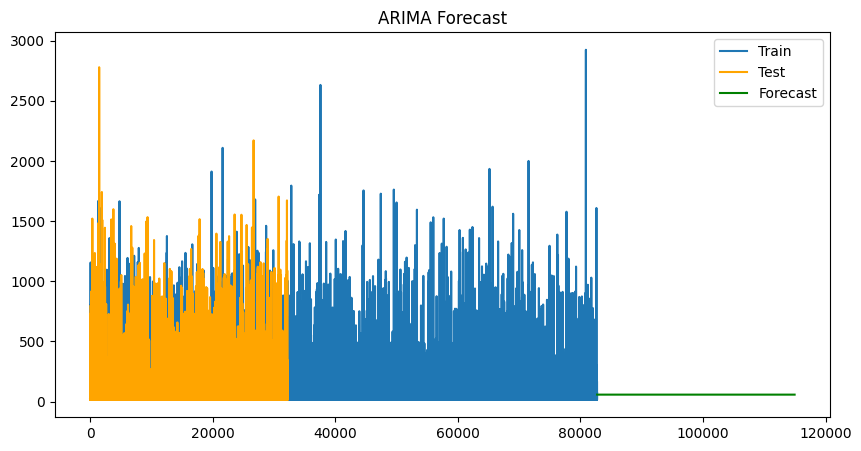

In [12]:
model = ARIMA(y_train, order=(2, 1, 2))  # (p, d, q)
arima_model = model.fit()

# Forecast on the test set
forecast = arima_model.forecast(steps=len(y_test))

# Evaluate the model
mae = mean_absolute_error(y_test, forecast)
mse = mean_squared_error(y_test, forecast)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test', color='orange')
plt.plot(forecast, label='Forecast', color='green')
plt.legend()
plt.title('ARIMA Forecast')
plt.show()

In [13]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [14]:
model = SARIMAX(y_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_model = model.fit()

# Forecast on the test set
forecast = sarimax_model.forecast(steps=len(y_test))

# Evaluate the model
mae = mean_absolute_error(y_test, forecast)
mse = mean_squared_error(y_test, forecast)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test', color='orange')
plt.plot(forecast, label='Forecast', color='green')
plt.legend()
plt.title('SARIMAX Forecast')
plt.show()

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
y_train = train_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)
y_test = test_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)
from sklearn.multioutput import MultiOutputRegressor

# Wrap AdaBoostRegressor with MultiOutputRegressor
model = MultiOutputRegressor(AdaBoostRegressor())
model.fit(x_train, y_train)

# Predict for the test set
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
y_pred = pd.DataFrame(y_pred,  columns = ['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
from sklearn.multioutput import MultiOutputRegressor

# Wrap AdaBoostRegressor with MultiOutputRegressor
model = MultiOutputRegressor(AdaBoostRegressor())
model.fit(x_train, y_train)

# Predict for the test set
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]
from sklearn.multioutput import MultiOutputRegressor

# Wrap AdaBoostRegressor with MultiOutputRegressor
model = MultiOutputRegressor(AdaBoostRegressor())
model.fit(x_train, y_train)

# Predict for the test set
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]
from sklearn.multioutput import MultiOutputRegressor

# Wrap AdaBoostRegressor with MultiOutputRegressor
model = MultiOutputRegressor(AdaBoostRegressor())
model.fit(x_train, y_train)

# Predict for the test set
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 1589.517198627526
R^2 Score: 0.10006733373531347
Mean Squared Error: 11027.051509493192
R^2 Score: -9.205616368538228
Mean Squared Error: 421633.7798338617
R^2 Score: -2.696139013106418
Mean Squared Error: 74456.51223328206
R^2 Score: -5.4864535320247985


In [ ]:
train_df.to_csv("train.csv")
test_df.to_csv("test.csv")

In [ ]:
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
from sklearn.multioutput import MultiOutputRegressor

# Wrap AdaBoostRegressor with MultiOutputRegressor
model = MultiOutputRegressor(AdaBoostRegressor())
model.fit(x_train, y_train)

# Predict for the test set
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]
from sklearn.multioutput import MultiOutputRegressor

# Wrap AdaBoostRegressor with MultiOutputRegressor
model = MultiOutputRegressor(AdaBoostRegressor())
model.fit(x_train, y_train)

# Predict for the test set
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]
from sklearn.multioutput import MultiOutputRegressor

# Wrap AdaBoostRegressor with MultiOutputRegressor
model = MultiOutputRegressor(AdaBoostRegressor())
model.fit(x_train, y_train)

# Predict for the test set
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 7258.277899483483
R^2 Score: -9.930206140147918
Mean Squared Error: 255391.26028486286
R^2 Score: -1.3939455780388397
Mean Squared Error: 60356.21029632143
R^2 Score: -4.258072688519059


In [ ]:
!pip install catboost

   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/101.7 MB 3.2 MB/s eta 0:00:32
   ---------------------------------------- 0.2/101.7 MB 1.9 MB/s eta 0:00:55
   ---------------------------------------- 0.4/101.7 MB 2.8 MB/s eta 0:00:36
   ---------------------------------------- 0.9/101.7 MB 4.9 MB/s eta 0:00:21
    --------------------------------------- 1.8/101.7 MB 7.4 MB/s eta 0:00:14
   - -------------------------------------- 2.9/101.7 MB 10.9 MB/s eta 0:00:10
   - -------------------------------------- 4.3/101.7 MB 13.9 MB/s eta 0:00:08
   -- ------------------------------------- 5.5/101.7 MB 15.2 MB/s eta 0:00:07
   -- ------------------------------------- 7.2/101.7 MB 17.1 MB/s eta 0:00:06
   --- ------------------------------------ 7.8/101.7 MB 18.5 MB/s eta 0:00:06
   --- ------------------------------------ 9.2/101.7 MB 17.8 MB/s eta 0:

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor

In [ ]:
y_train.nunique()

Diverted                      1
ActualElapsedTime           531
AirTime                     499
CarrierDelay                789
WeatherDelay                391
NASDelay                    359
SecurityDelay                84
LateAircraftDelay           605
CancellationCode_encoded      1
dtype: int64

Mean Squared Error: 1579.2704240338917
R^2 Score: 0.2415301975385838
Mean Squared Error: 1901.817822373944
R^2 Score: 0.2836046251449182
Mean Squared Error: 99915.8825999789
R^2 Score: 0.3928576864500484
Mean Squared Error: 11476.13065051873
R^2 Score: 0.00022998715267708025


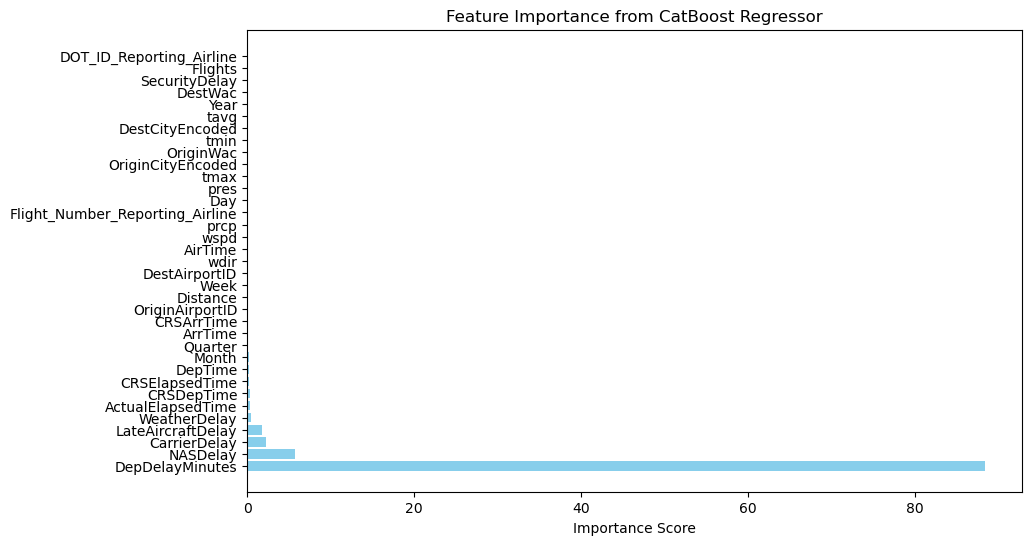

In [ ]:
y_train = train_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)
y_test = test_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)
cat_regressor = MultiOutputRegressor(CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1, verbose=0))

cat_regressor.fit(x_train, y_train)

# Make predictions
y_pred = cat_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']]

cat_regressor = MultiOutputRegressor(CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1, verbose=0))

cat_regressor.fit(x_train, y_train)

# Make predictions
y_pred = cat_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]
cat_regressor = MultiOutputRegressor(CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1, verbose=0))

cat_regressor.fit(x_train, y_train)

# Make predictions
y_pred = cat_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]
cat_regressor = CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1, verbose=0)

cat_regressor.fit(x_train, y_train)

# Make predictions
y_pred = cat_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
importances = cat_regressor.get_feature_importance()

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from CatBoost Regressor')
plt.show()

In [ ]:
np.unique(y_train)

array([0.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 4.000e+00, 5.000e+00,
       6.000e+00, 7.000e+00, 8.000e+00, 9.000e+00, 1.000e+01, 1.100e+01,
       1.200e+01, 1.300e+01, 1.400e+01, 1.500e+01, 1.600e+01, 1.700e+01,
       1.800e+01, 1.900e+01, 2.000e+01, 2.100e+01, 2.200e+01, 2.300e+01,
       2.400e+01, 2.500e+01, 2.600e+01, 2.700e+01, 2.800e+01, 2.900e+01,
       3.000e+01, 3.100e+01, 3.200e+01, 3.300e+01, 3.400e+01, 3.500e+01,
       3.600e+01, 3.700e+01, 3.800e+01, 3.900e+01, 4.000e+01, 4.100e+01,
       4.200e+01, 4.300e+01, 4.400e+01, 4.500e+01, 4.600e+01, 4.700e+01,
       4.800e+01, 4.900e+01, 5.000e+01, 5.100e+01, 5.200e+01, 5.300e+01,
       5.400e+01, 5.500e+01, 5.600e+01, 5.700e+01, 5.800e+01, 5.900e+01,
       6.000e+01, 6.100e+01, 6.200e+01, 6.300e+01, 6.400e+01, 6.500e+01,
       6.600e+01, 6.700e+01, 6.800e+01, 6.900e+01, 7.000e+01, 7.100e+01,
       7.200e+01, 7.300e+01, 7.400e+01, 7.500e+01, 7.600e+01, 7.700e+01,
       7.800e+01, 7.900e+01, 8.000e+01, 8.100e+01, 

Mean Squared Error: 1901.3194104479885
R^2 Score: 0.2831199615342886
Mean Squared Error: 100414.01462747937
R^2 Score: 0.3907459380645191
Mean Squared Error: 11499.68732220125
R^2 Score: -0.001822207499673656


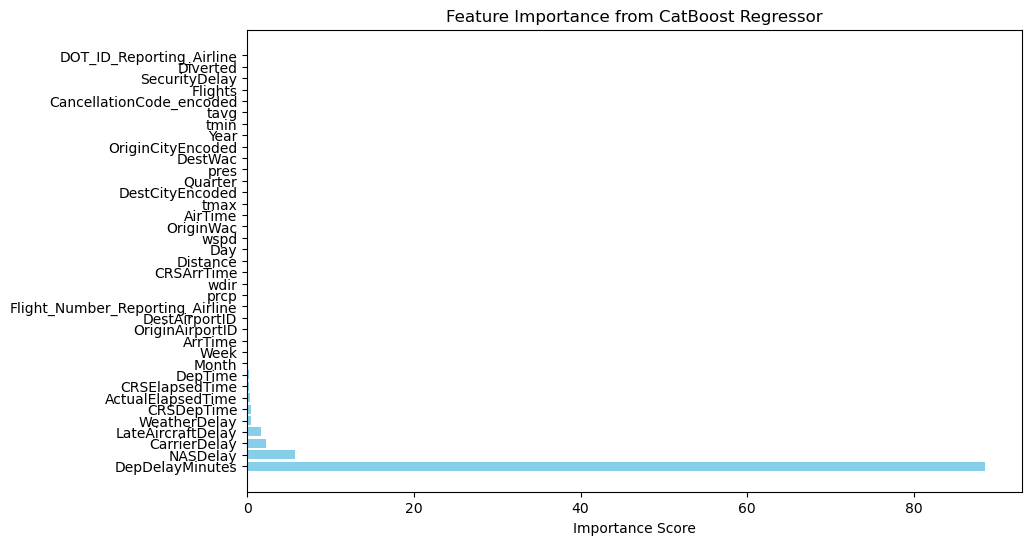

In [ ]:
y_train = train_df[['ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], axis = 1)
y_test = test_df[['ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], axis = 1)
cat_regressor = MultiOutputRegressor(CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1, verbose=0))

cat_regressor.fit(x_train, y_train)

# Make predictions
y_pred = cat_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]
cat_regressor = MultiOutputRegressor(CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1, verbose=0))

cat_regressor.fit(x_train, y_train)

# Make predictions
y_pred = cat_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]
cat_regressor = CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1, verbose=0)

cat_regressor.fit(x_train, y_train)

# Make predictions
y_pred = cat_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
importances = cat_regressor.get_feature_importance()

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from CatBoost Regressor')
plt.show()

Mean Squared Error: 1595.951159250555
R^2 Score: 0.020911770063469306


C:\Users\kopal\anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


Mean Squared Error: 1506.3673541884723
R^2 Score: 0.43541130026152036
Mean Squared Error: 153787.63913057183
R^2 Score: 0.2661842717495381


C:\Users\kopal\anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.366e+05, tolerance: 8.294e+04
  model = cd_fast.enet_coordinate_descent(


Mean Squared Error: 11449.24193829529
R^2 Score: 0.0025724603244914324


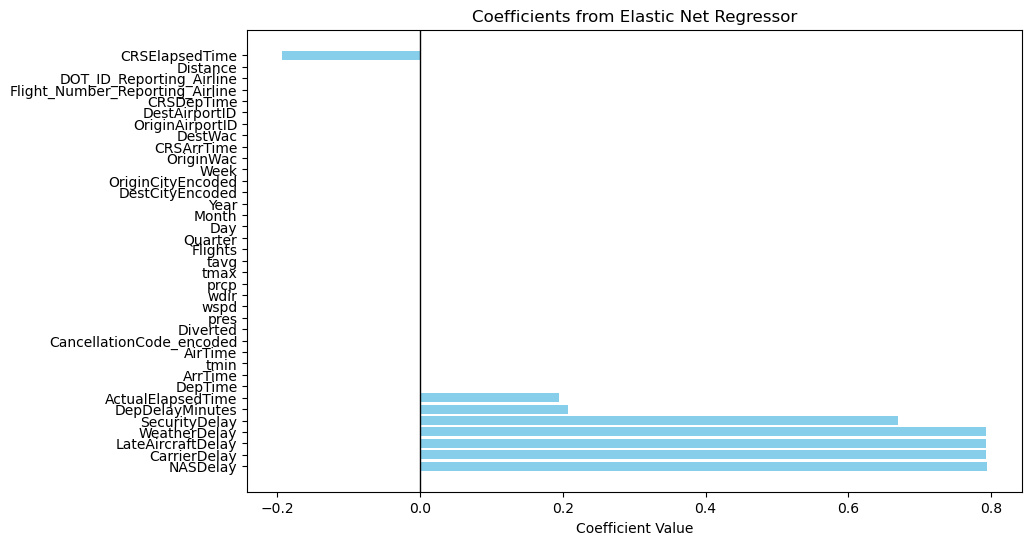

In [ ]:
y_train = train_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)
y_test = test_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import ElasticNet
elastic_net_regressor = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
elastic_net_regressor.fit(x_train, y_train)

# Make predictions
y_pred = elastic_net_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


y_pred = pd.DataFrame(y_pred,  columns = ['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
elastic_net_regressor = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
elastic_net_regressor.fit(x_train, y_train)

# Make predictions
y_pred = elastic_net_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]
elastic_net_regressor = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
elastic_net_regressor.fit(x_train, y_train)

# Make predictions
y_pred = elastic_net_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]

elastic_net_regressor = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
elastic_net_regressor.fit(x_train, y_train)

# Make predictions
y_pred = elastic_net_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

coefficients = elastic_net_regressor.coef_

# Create a DataFrame for visualization
coef_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Plotting coefficients
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Coefficients from Elastic Net Regressor')
plt.axvline(0, color='black', lw=1)
plt.show()

C:\Users\kopal\anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


Mean Squared Error: 1505.9317532775078
R^2 Score: 0.4355781382454387
Mean Squared Error: 153786.40672511293
R^2 Score: 0.26642081337403367


C:\Users\kopal\anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.366e+05, tolerance: 8.294e+04
  model = cd_fast.enet_coordinate_descent(


Mean Squared Error: 11441.356956678097
R^2 Score: 0.003259378974408089


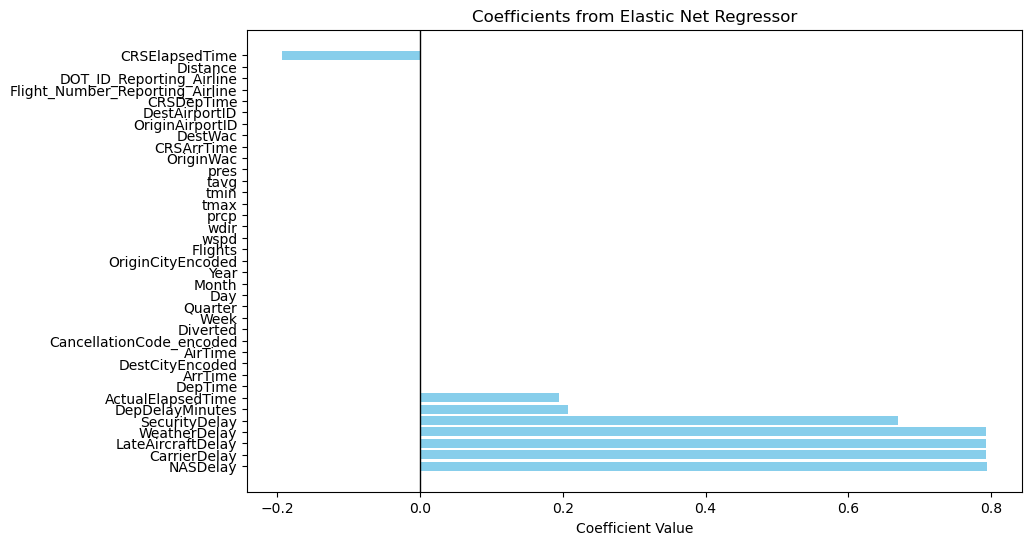

In [ ]:
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import ElasticNet
elastic_net_regressor = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
elastic_net_regressor.fit(x_train, y_train)

# Make predictions
y_pred = elastic_net_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]
elastic_net_regressor = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
elastic_net_regressor.fit(x_train, y_train)

# Make predictions
y_pred = elastic_net_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]
elastic_net_regressor = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
elastic_net_regressor.fit(x_train, y_train)

# Make predictions
y_pred = elastic_net_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


coefficients = elastic_net_regressor.coef_

# Create a DataFrame for visualization
coef_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Plotting coefficients
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Coefficients from Elastic Net Regressor')
plt.axvline(0, color='black', lw=1)
plt.show()

In [ ]:
y_train = train_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)
y_test = test_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import ExtraTreesRegressor
et_regressor = ExtraTreesRegressor(n_estimators=100, random_state=42)
et_regressor.fit(x_train, y_train)

# Make predictions
y_pred = et_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
et_regressor = ExtraTreesRegressor(n_estimators=100, random_state=42)
et_regressor.fit(x_train, y_train)

# Make predictions
y_pred = et_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]
et_regressor = ExtraTreesRegressor(n_estimators=100, random_state=42)
et_regressor.fit(x_train, y_train)

# Make predictions
y_pred = et_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]

et_regressor = ExtraTreesRegressor(n_estimators=100, random_state=42)
et_regressor.fit(x_train, y_train)

# Make predictions
y_pred = et_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
importances = et_regressor.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from Extra Trees Regressor')
plt.show()

In [ ]:
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)


from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import ExtraTreesRegressor
et_regressor = ExtraTreesRegressor(n_estimators=100, random_state=42)
et_regressor.fit(x_train, y_train)

# Make predictions
y_pred = et_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]


et_regressor = ExtraTreesRegressor(n_estimators=100, random_state=42)
et_regressor.fit(x_train, y_train)

# Make predictions
y_pred = et_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]
et_regressor = ExtraTreesRegressor(n_estimators=100, random_state=42)
et_regressor.fit(x_train, y_train)

# Make predictions
y_pred = et_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
importances = et_regressor.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from Extra Trees Regressor')
plt.show()

In [ ]:
!pip install xgboost

In [ ]:
y_train = train_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)
y_test = test_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)

from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
xg_regressor = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xg_regressor.fit(x_train, y_train)

# Make predictions
y_pred = xg_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
xg_regressor = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xg_regressor.fit(x_train, y_train)

# Make predictions
y_pred = xg_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]
xg_regressor = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xg_regressor.fit(x_train, y_train)

# Make predictions
y_pred = xg_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]

xg_regressor = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xg_regressor.fit(x_train, y_train)

# Make predictions
y_pred = xg_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
importances = xg_regressor.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from XGBoost Regressor')
plt.show()

In [ ]:
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)


from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
xg_regressor = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xg_regressor.fit(x_train, y_train)

# Make predictions
y_pred = xg_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]
xg_regressor = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xg_regressor.fit(x_train, y_train)

# Make predictions
y_pred = xg_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]
xg_regressor = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xg_regressor.fit(x_train, y_train)

# Make predictions
y_pred = xg_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

importances = xg_regressor.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from XGBoost Regressor')
plt.show()


In [ ]:
!pip install lightgbm

In [ ]:
y_train = train_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)
y_test = test_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)

from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb
lgb_regressor = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=-1, random_state=42)
lgb_regressor.fit(x_train, y_train)

# Make predictions
y_pred = lgb_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
lgb_regressor = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=-1, random_state=42)
lgb_regressor.fit(x_train, y_train)

# Make predictions
y_pred = lgb_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]
lgb_regressor = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=-1, random_state=42)
lgb_regressor.fit(x_train, y_train)

# Make predictions
y_pred = lgb_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]

lgb_regressor = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=-1, random_state=42)
lgb_regressor.fit(x_train, y_train)

# Make predictions
y_pred = lgb_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

importances = lgb_regressor.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from LightGBM Regressor')
plt.show()

In [ ]:
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)

from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb
lgb_regressor = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=-1, random_state=42)
lgb_regressor.fit(x_train, y_train)

# Make predictions
y_pred = lgb_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]
lgb_regressor = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=-1, random_state=42)
lgb_regressor.fit(x_train, y_train)

# Make predictions
y_pred = lgb_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]
lgb_regressor = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=-1, random_state=42)
lgb_regressor.fit(x_train, y_train)

# Make predictions
y_pred = lgb_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

importances = lgb_regressor.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from LightGBM Regressor')
plt.show()

In [ ]:
y_train = train_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)
y_test = test_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(x_train, y_train)

# Make predictions
y_pred = gbr.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
y_pred = pd.DataFrame(y_pred,  columns = ['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(x_train, y_train)

# Make predictions
y_pred = gbr.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(x_train, y_train)

# Make predictions
y_pred = gbr.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(x_train, y_train)

# Make predictions
y_pred = gbr.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
importances = gbr.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from Gradient Boosting Regressor')
plt.show()


In [ ]:
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)


from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(x_train, y_train)

# Make predictions
y_pred = gbr.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]


gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(x_train, y_train)

# Make predictions
y_pred = gbr.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]

# Make predictions
y_pred = gbr.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

importances = gbr.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from Gradient Boosting Regressor')
plt.show()

In [ ]:
y_train = train_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)
y_test = test_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # You can adjust C and epsilon
from sklearn.multioutput import MultiOutputRegressor

# Wrap SVR with MultiOutputRegressor to handle multiple outputs
svr = SVR()
multi_target_svr = MultiOutputRegressor(svr)

# Fit the model on multi-target data
multi_target_svr.fit(x_train, y_train)

# Make predictions
y_pred = multi_target_svr.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
y_pred = pd.DataFrame(y_pred,  columns = ['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # You can adjust C and epsilon
from sklearn.multioutput import MultiOutputRegressor

# Wrap SVR with MultiOutputRegressor to handle multiple outputs
svr = SVR()
multi_target_svr = MultiOutputRegressor(svr)

# Fit the model on multi-target data
multi_target_svr.fit(x_train, y_train)

# Make predictions
y_pred = multi_target_svr.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # You can adjust C and epsilon
from sklearn.multioutput import MultiOutputRegressor

# Wrap SVR with MultiOutputRegressor to handle multiple outputs
svr = SVR()
multi_target_svr = MultiOutputRegressor(svr)

# Fit the model on multi-target data
multi_target_svr.fit(x_train, y_train)

# Make predictions
y_pred = multi_target_svr.predict(x_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]

from sklearn.multioutput import MultiOutputRegressor

# Wrap SVR with MultiOutputRegressor to handle multiple outputs
svr = SVR()
multi_target_svr = MultiOutputRegressor(svr)

# Fit the model on multi-target data
multi_target_svr.fit(x_train, y_train)

# Make predictions
y_pred = multi_target_svr.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

if svr.kernel == 'linear':
    coefficients = svr.coef_.flatten()

    # Create a DataFrame for visualization
    coef_df = pd.DataFrame({
        'Feature': x_train.columns,
        'Coefficient': coefficients
    }).sort_values(by='Coefficient', ascending=False)

    # Plotting coefficients
    plt.figure(figsize=(10, 6))
    plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
    plt.xlabel('Coefficient Value')
    plt.title('SVR Regression Coefficients (Linear Kernel)')
    plt.axvline(0, color='grey', linestyle='--')  # Vertical line at zero for reference
    plt.show()
else:
    print("Feature importances cannot be visualized for non-linear SVR models.")


In [ ]:
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # You can adjust C and epsilon
from sklearn.multioutput import MultiOutputRegressor

# Wrap SVR with MultiOutputRegressor to handle multiple outputs
svr = SVR()
multi_target_svr = MultiOutputRegressor(svr)

# Fit the model on multi-target data
multi_target_svr.fit(x_train, y_train)

# Make predictions
y_pred = multi_target_svr.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]


svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # You can adjust C and epsilon
from sklearn.multioutput import MultiOutputRegressor

# Wrap SVR with MultiOutputRegressor to handle multiple outputs
svr = SVR()
multi_target_svr = MultiOutputRegressor(svr)

# Fit the model on multi-target data
multi_target_svr.fit(x_train, y_train)

# Make predictions
y_pred = multi_target_svr.predict(x_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # You can adjust C and epsilon
from sklearn.multioutput import MultiOutputRegressor

# Wrap SVR with MultiOutputRegressor to handle multiple outputs
svr = SVR()
multi_target_svr = MultiOutputRegressor(svr)

# Fit the model on multi-target data
multi_target_svr.fit(x_train, y_train)

# Make predictions
y_pred = multi_target_svr.predict(x_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

if svr.kernel == 'linear':
    coefficients = svr.coef_.flatten()

    # Create a DataFrame for visualization
    coef_df = pd.DataFrame({
        'Feature': x_train.columns,
        'Coefficient': coefficients
    }).sort_values(by='Coefficient', ascending=False)

    # Plotting coefficients
    plt.figure(figsize=(10, 6))
    plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
    plt.xlabel('Coefficient Value')
    plt.title('SVR Regression Coefficients (Linear Kernel)')
    plt.axvline(0, color='grey', linestyle='--')  # Vertical line at zero for reference
    plt.show()
else:
    print("Feature importances cannot be visualized for non-linear SVR models.")
